In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
gradient_direction_filenames= [
    'ariel_scheme_shell-1_directions-10_method-IMOC1OptCNLO.txt',
    'ariel_scheme_shell-2_directions-25_method-IMOC1OptCNLO.txt',
    'ariel_scheme_shell-3_directions-30_method-IMOC1OptCNLO.txt']

pre_norm_shell_directions=[np.loadtxt(filename) for filename in gradient_direction_filenames]

low_bvals = [10, 25, 50, 100, 200, 10, 25, 50, 100, 200]
shell_bvals = [500.0, 1200.0, 2400.0]
max_bval = np.max(shell_bvals)

bval_ratio_norm_shell_directions = []

for i in range(0, np.size(low_bvals)):
    bval_ratio_norm_shell_directions.append(np.sqrt(low_bvals[i] / max_bval) * pre_norm_shell_directions[0][i])

for i in range(0, np.size(shell_bvals)):
    for gradient_direction in pre_norm_shell_directions[i]:
        bval_ratio_norm_shell_directions.append(np.sqrt(shell_bvals[i] / max_bval) * gradient_direction)

bval_ratio_norm_shell_directions = np.vstack(bval_ratio_norm_shell_directions)


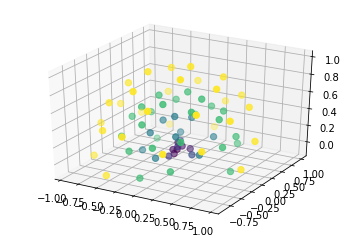

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
(x,y,z)=np.hsplit(bval_ratio_norm_shell_directions,3)
c=np.linalg.norm(bval_ratio_norm_shell_directions, axis=1)
#ax.scatter(x, y,z, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)
ax.scatter(x, y, z, zdir='z', s=40, c=c, depthshade=True)

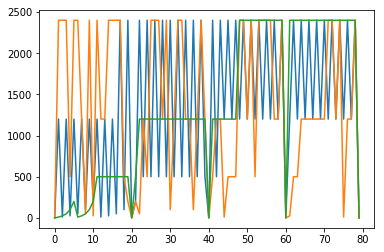

In [65]:
bval_ratio_norm_shell_with_zeros = np.zeros((80,3))
bval_ratio_norm_shell_with_zeros[1:20] = bval_ratio_norm_shell_directions[0:19]
bval_ratio_norm_shell_with_zeros[21:40] = bval_ratio_norm_shell_directions[19:38]
bval_ratio_norm_shell_with_zeros[41:60] = bval_ratio_norm_shell_directions[38:57]
bval_ratio_norm_shell_with_zeros[61:79] = bval_ratio_norm_shell_directions[57:75]

permutation_indices=np.hstack([37]+[x for x in zip(range(0,37), range(38,75))])
bval_ratio_norm_shell_interleave = bval_ratio_norm_shell_directions[permutation_indices]
bval_ratio_norm_shell_interleave_with_zeros = np.zeros((80,3))
bval_ratio_norm_shell_interleave_with_zeros[1:20] = bval_ratio_norm_shell_interleave[0:19]
bval_ratio_norm_shell_interleave_with_zeros[21:40] = bval_ratio_norm_shell_interleave[19:38]
bval_ratio_norm_shell_interleave_with_zeros[41:60] = bval_ratio_norm_shell_interleave[38:57]
bval_ratio_norm_shell_interleave_with_zeros[61:79] = bval_ratio_norm_shell_interleave[57:75]


random_permutation_indices = np.random.permutation(75)
bval_ratio_norm_shell_random_permutation = bval_ratio_norm_shell_directions[random_permutation_indices]
bval_ratio_norm_shell_random_permutation_with_zeros = np.zeros((80,3))
bval_ratio_norm_shell_random_permutation_with_zeros[1:20] = bval_ratio_norm_shell_random_permutation[0:19]
bval_ratio_norm_shell_random_permutation_with_zeros[21:40] = bval_ratio_norm_shell_random_permutation[19:38]
bval_ratio_norm_shell_random_permutation_with_zeros[41:60] = bval_ratio_norm_shell_random_permutation[38:57]
bval_ratio_norm_shell_random_permutation_with_zeros[61:79] = bval_ratio_norm_shell_random_permutation[57:75]

plt.plot((np.sqrt(max_bval)*np.linalg.norm(bval_ratio_norm_shell_interleave_with_zeros, axis=1))**2)
plt.plot((np.sqrt(max_bval)*np.linalg.norm(bval_ratio_norm_shell_random_permutation_with_zeros, axis=1))**2)
plt.plot((np.sqrt(max_bval)*np.linalg.norm(bval_ratio_norm_shell_with_zeros, axis=1))**2)

In [62]:
def write_siemens_gradient_file(gradient_vectors, filename, normalisation='none', comment='gradient vector file'):

    number_of_gradients = gradient_vectors.shape[0]
    
    with open(filename, 'w') as out_file:
        out_file.write('# ' + comment.rstrip() + '\n')
        out_file.write('----------------------------------------------------------\n')
        out_file.write('\n')
        out_file.write('\n')
        out_file.write('[directions={0}]\n'.format(number_of_gradients))
        out_file.write('CoordinateSystem = xyz\n')
        out_file.write('Normalization = {0}\n'.format(normalisation))
        for gradient_index in range(0, number_of_gradients):
            out_file.write('Vector[{0}] = ( {1:6.5f}, {2:6.5f}, {3:6.5f} )\n'.format(
                gradient_index,
                gradient_vectors[gradient_index][0],
                gradient_vectors[gradient_index][1],
                gradient_vectors[gradient_index][2]))


In [64]:
write_siemens_gradient_file(bval_ratio_norm_shell_with_zeros, 'ariel_scheme_no_reorder.txt', 
                            comment="Scheme suggested by Ariel Rokem without reordering (large gradients are consecutive)")
write_siemens_gradient_file(bval_ratio_norm_shell_random_permutation_with_zeros, 'ariel_scheme_random_permutation.txt', 
                            comment="Scheme suggested by Ariel Rokem, gradients are randomly permuted")
write_siemens_gradient_file(bval_ratio_norm_shell_interleave_with_zeros, 'ariel_scheme_interleaved.txt', 
                            comment="Scheme suggested by Ariel Rokem, gradients are interleaved so that large gradients are not consecutive")